In [17]:
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [18]:
jobs_of_interest = ['output/' + x for x in os.listdir('output') if 'clients_100' in x]
jobs_of_interest


['output/19367671_output_f_17500_clients_100.log',
 'output/19367669_output_f_15000_clients_100.log',
 'output/19368407_clients_100.log',
 'output/19367672_output_f_5000_clients_100.log',
 'output/19367670_output_f_12000_clients_100.log']

In [19]:
for j in jobs_of_interest:
    print(len(j.split('_')))

6
6
3
6
6


In [20]:
def extract_eval_acc(file_path):
    # Regex to find eval_acc values
    pattern = r"eval_acc=(\d+\.\d+)"
    
    # Open file and read contents
    with open(file_path, 'r') as file:
        log_text = file.read()
    
    # Find all matches in the log text
    matches = re.findall(pattern, log_text)
    
    # Convert matches to float, skipping the first occurrence
    eval_acc_values = [float(acc) for acc in matches[1:]] if len(matches) > 1 else []
    
    return eval_acc_values

x = extract_eval_acc('output/19366182_output_f_8000_clients_2.log')
len(x), max(x), min(x)

(9999, 0.742, 0.101)

In [21]:
accuracies = {}
for log_file in jobs_of_interest:
    splits = log_file.split('_')
    if len(splits) >=4:
        q = splits[3]
        key = 'q='+ q
    else:
        key = 'No GA'
    values = extract_eval_acc(log_file)
    accuracies[key] = values

In [23]:
df.columns

TypeError: 'Index' object is not callable

In [32]:
df = pd.DataFrame.from_dict(accuracies, orient='index').transpose()
df = df.sort_index(axis=1)
df

,No GA,q=12000,q=15000,q=17500,q=5000
0,0.120,0.099,0.105,0.106,0.112
1,0.106,0.092,0.114,0.115,0.104
2,0.106,0.092,0.114,0.115,0.104
3,0.102,0.095,0.122,0.122,0.112
4,0.102,0.095,0.122,0.122,0.112
...,...,...,...,...,...
19994,0.821,0.759,0.762,0.773,0.709
19995,0.818,0.752,0.760,0.767,0.722
19996,0.818,0.752,0.760,0.767,0.722
19997,0.813,0.763,0.755,0.768,0.716


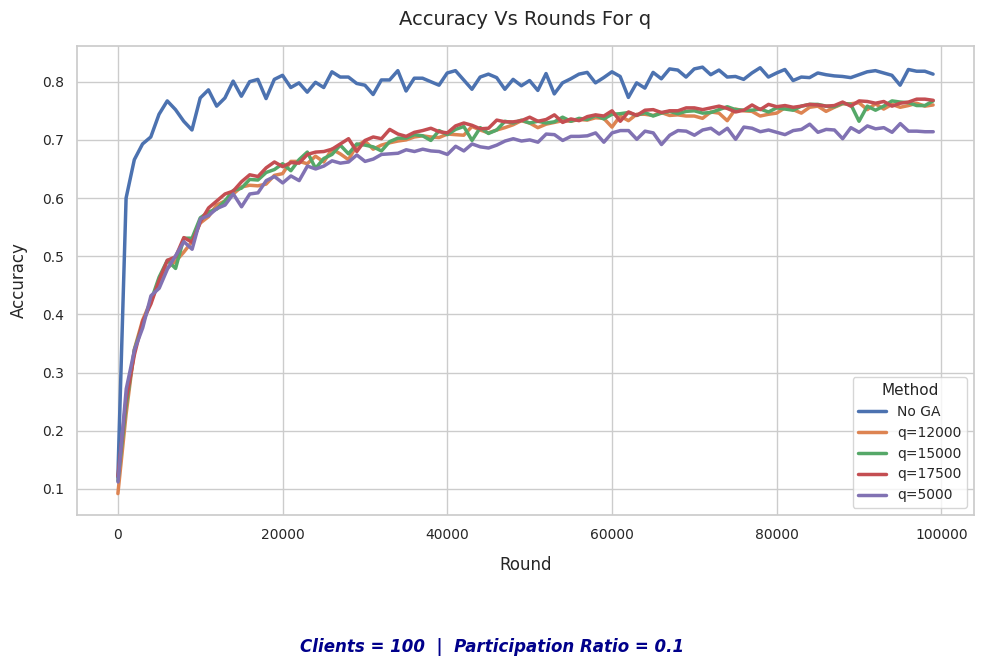

In [40]:
# Convert the DataFrame into long format
df_long = df.reset_index().melt(id_vars='index', var_name='q', value_name='value')

# Multiply the 'index' values to represent true Rounds
df_long['index'] = df_long['index'] * 5

# Sample the DataFrame by every 100th row
df_long_sampled = df_long.iloc[::200, :]

# Set the plot style to make it visually appealing
sns.set(style='whitegrid')  # Adds a clean grid background

# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size for better presentation
sns.lineplot(data=df_long_sampled, x='index', y='value', hue='q', linewidth=2.5)

# Add labels and a title
plt.xlabel('Round', fontsize=12, labelpad=10)
plt.ylabel('Accuracy', fontsize=12, labelpad=10)
plt.title('Accuracy Vs Rounds For q', fontsize=14, pad=15)

# Add additional information beneath the plot using figtext
plt.figtext(0.5, -0.1, 'Clients = 100  |  Participation Ratio = 0.1', ha='center',
            fontsize=12, fontstyle='italic', fontweight='bold', color='darkblue')



# Customize the ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add a legend
plt.legend(title='Method', fontsize=10, title_fontsize=11, loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
accuracies.keys()

dict_keys(['q=15000', 'q=10000'])

In [10]:
max(accuracies['q=15000']), max(accuracies['q=10000'])

(0.777, 0.77)